<a href="https://colab.research.google.com/github/Bobbyorr007/HAMOYE-STAGE-B-QUIZ-CODE/blob/main/HAMOYE_STAGE_B_QUIZ_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
%matplotlib inline

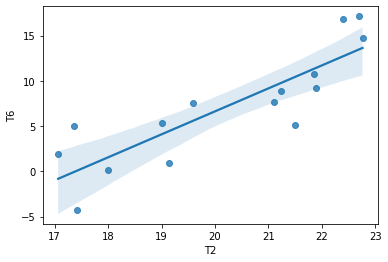

In [2]:
df=pd.read_csv('/content/energydata_complete.csv')

#select a sample of the dataset
simple_linear_reg_df = df[['T2','T6']].sample(15, random_state=2)

#regression plot
sns.regplot(x='T2',y='T6',data=simple_linear_reg_df)


In [3]:
# R_Squared
from sklearn.metrics import r2_score
r2_score = r2_score(df['T2'], df['T6'])
round(r2_score, 2)

-35.39

In [4]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [5]:
# Firstly, we normalize the dataset to a common scale using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Appliances'] = df['Appliances']. astype(float) # Transform as float
features_df = df.drop(columns=['date', 'lights'], axis=1)
normalised_df = pd.DataFrame(scaler.fit_transform(features_df))
Appliances_target = features_df['Appliances']

# Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,Appliances_target,test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [6]:
# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.0

In [7]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

0.0

In [8]:
# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.0

In [9]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

1.0

In [10]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,T7,-7.083452e-15
1,T1,-5.471463e-15
2,RH_2,-2.962877e-15
3,RH_8,-2.339467e-15
4,T5,-2.031700e-15
5,T6,-1.447817e-15
6,RH_4,-1.170387e-15
7,T2,-7.584021e-16
8,Visibility,-4.455968e-16
9,Press_mm_hg,-2.122549e-16


In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
pred_ridge_reg = ridge_reg.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_ridge_reg)))

2.9907788712193014e-07


In [12]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [13]:
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,T7,0.0
1,Tdewpoint,0.0
2,Visibility,0.0
3,Windspeed,0.0
4,RH_out,-0.0
5,Press_mm_hg,-0.0
6,T_out,0.0
7,RH_9,-0.0
8,T9,0.0
9,RH_8,-0.0


In [17]:
pred_lasso_reg = lasso_reg.predict(x_test)
lasso_rmse = (np.sqrt(mean_squared_error(y_test,pred_lasso_reg)))
print(lasso_rmse)
round(lasso_rmse,3)

9.575599621503274e-06


0.0